In [1]:
# Data Processing : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('spam.tsv',sep='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [91]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [13]:
df['label'].value_counts()/ len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [14]:
df['label'].value_counts()


ham     4825
spam     747
Name: label, dtype: int64

In [18]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [19]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [21]:
ham = ham.sample(spam.shape[0])
ham

,label,message,length,punct
1474,ham,"Will do, you gonna be at blake's all night? I ...",93,3
2098,ham,Are you the cutest girl in the world or what,44,0
1326,ham,Yeah jay's sort of a fucking retard,35,1
3253,ham,Come to medical college at 7pm ......forward i...,50,6
3649,ham,As per your request 'Maangalyam (Alaipayuthe)'...,136,6
...,...,...,...,...
3133,ham,I've been barred from all B and Q stores for l...,155,6
3491,ham,Huh but i got lesson at 4 lei n i was thinkin ...,105,3
1953,ham,Nah im goin 2 the wrks with j wot bout u?,41,1
1409,ham,"I've got ten bucks, jay is being noncomittal",44,2


In [22]:
ham.shape , spam.shape


((747, 4), (747, 4))

In [25]:
data = ham.append(spam,ignore_index=True)
data.shape

(1494, 4)

In [26]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [27]:
data.head()

,label,message,length,punct
0,ham,"Will do, you gonna be at blake's all night? I ...",93,3
1,ham,Are you the cutest girl in the world or what,44,0
2,ham,Yeah jay's sort of a fucking retard,35,1
3,ham,Come to medical college at 7pm ......forward i...,50,6
4,ham,As per your request 'Maangalyam (Alaipayuthe)'...,136,6


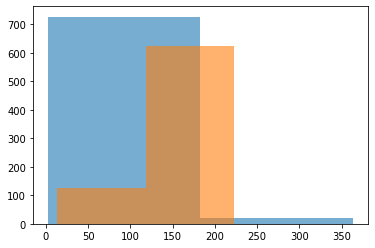

In [112]:
plt.hist(data[data['label'] == 'ham']['length'],bins=100,alpha=0.6) # alpha : opacity / bins : rectangle count
plt.hist(data[data['label'] == 'spam']['length'],bins=100,alpha=0.6) 
plt.show()

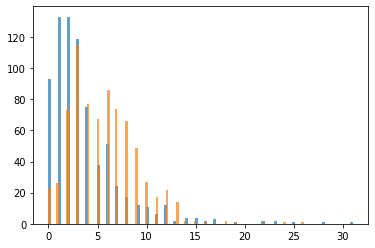

In [37]:
plt.hist(data[data['label'] == 'ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [ ]:
data

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X_train, X_test,Y_train,Y_test =  train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [43]:
X_train.shape

(1045,)

In [44]:
X_test.shape

(449,)

In [45]:
Y_train.shape

(1045,)

In [48]:
# Apply Random Forest Ml Algorithm : (Build Model)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [74]:
classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=10))])

In [84]:
classifier.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [85]:
# Predicting the results (Random Forest :)
y_pred = classifier.predict(X_test)

In [ ]:
Y_test,y_pred

In [56]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [57]:
accuracy_score(Y_test,y_pred)

0.9287305122494433

In [58]:
confusion_matrix(Y_test,y_pred)

array([[225,   2],
       [ 30, 192]])

In [ ]:
print(classification_report(Y_test,y_pred))

In [61]:
# Building Model (SVM) : 
from sklearn.svm import SVC

In [64]:
svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])

In [ ]:
svm.fit(X_train,Y_train)


In [66]:
y_pred = svm.predict(X_test)

In [67]:
accuracy_score(Y_test,y_pred)

0.9398663697104677

In [68]:
confusion_matrix(Y_test,y_pred)

array([[225,   2],
       [ 25, 197]])

In [69]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       227
        spam       0.99      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [81]:
test_1 = ['Hello,You are learning Natural Language Processing :)']
test_2 = ['Hope you are doing good and learning new things!']
test_3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To Claim call on 765437845745']

In [89]:
print(classifier.predict(test_1))
print(classifier.predict(test_2))
print(classifier.predict(test_3))


['ham']
['ham']
['spam']


In [90]:
print(svm.predict(test_1))
print(svm.predict(test_2))
print(svm.predict(test_3))

['ham']
['ham']
['spam']
